# K-Mode Clustering on Bank Marketing Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

**Attribute Information(Categorical):**

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- UCI Repository: <https://archive.ics.uci.edu/ml/datasets/bank+marketing>

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
import warnings
warnings.filterwarnings("ignore") 

In [8]:
bank = pd.read_csv('bankmarketing.csv')

In [9]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [11]:
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [12]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [13]:
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

In [14]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [15]:
bank_cust  = bank_cust.drop('age',axis = 1)

In [16]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [17]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
job            41188 non-null object
marital        41188 non-null object
education      41188 non-null object
default        41188 non-null object
housing        41188 non-null object
loan           41188 non-null object
contact        41188 non-null object
month          41188 non-null object
day_of_week    41188 non-null object
poutcome       41188 non-null object
age_bin        41188 non-null category
dtypes: category(1), object(10)
memory usage: 3.2+ MB


In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


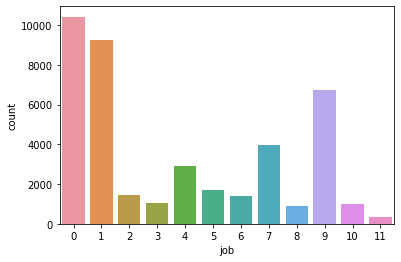

In [21]:
sns.countplot('job',data=bank_cust)

In [19]:
# Checking the count per category
job_df = pd.DataFrame(bank_cust['job'].value_counts())

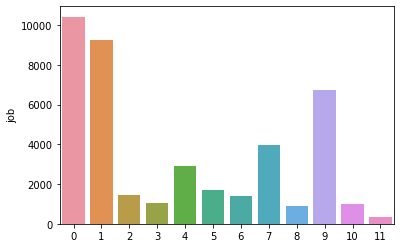

In [20]:
sns.barplot(x=job_df.index, y=job_df['job'])

In [40]:
# Checking the count per category
age_df = pd.DataFrame(bank_cust['age_bin'].value_counts())

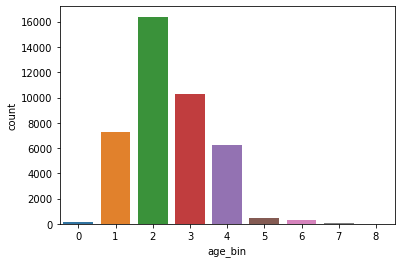

In [22]:
sns.countplot('age_bin',data=bank_cust)

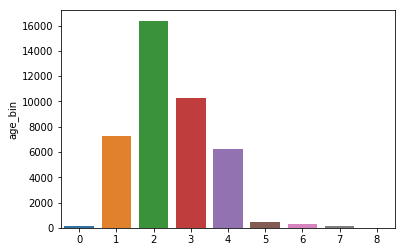

In [41]:
sns.barplot(x=age_df.index, y=age_df['age_bin'])

## Using K-Mode with "Cao" initialization

In [23]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [24]:
# Predicted Clusters
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [25]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [26]:
# Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,2
1,1,1,3,0,0,0,1,6,0,1,3


## Using K-Mode with "Huang" initialization

In [27]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9277, cost: 201047.0
Run 1, iteration: 2/100, moves: 580, cost: 201047.0


In [28]:
# Predicted clusters
fitClusters_huang

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

## Choosing K by comparing Cost against each K

In [29]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


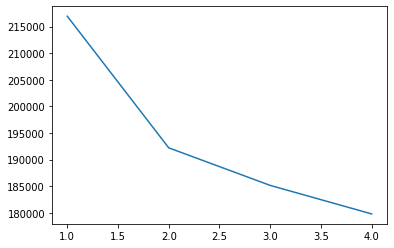

In [30]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [31]:
## Choosing K=2

In [32]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [33]:
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

### Combining the predicted clusters with the original DF.

In [34]:
bank_cust = bank_cust.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [35]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,3,1,0,0,0,0,1,6,1,1,4,1
1,7,1,3,1,0,0,1,6,1,1,4,1
2,7,1,3,0,2,0,1,6,1,1,2,0
3,0,1,1,0,0,0,1,6,1,1,2,0
4,7,1,3,0,0,2,1,6,1,1,4,1


In [36]:
# Data for Cluster1
cluster1 = combinedDf[combinedDf.cluster_predicted==1]

In [37]:
# Data for Cluster0
cluster0 = combinedDf[combinedDf.cluster_predicted==0]

In [38]:
cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12895 entries, 0 to 41186
Data columns (total 12 columns):
job                  12895 non-null int32
marital              12895 non-null int32
education            12895 non-null int32
default              12895 non-null int32
housing              12895 non-null int32
loan                 12895 non-null int32
contact              12895 non-null int32
month                12895 non-null int32
day_of_week          12895 non-null int32
poutcome             12895 non-null int32
age_bin              12895 non-null int32
cluster_predicted    12895 non-null uint16
dtypes: int32(11), uint16(1)
memory usage: 680.0 KB


In [39]:
cluster0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28293 entries, 2 to 41187
Data columns (total 12 columns):
job                  28293 non-null int32
marital              28293 non-null int32
education            28293 non-null int32
default              28293 non-null int32
housing              28293 non-null int32
loan                 28293 non-null int32
contact              28293 non-null int32
month                28293 non-null int32
day_of_week          28293 non-null int32
poutcome             28293 non-null int32
age_bin              28293 non-null int32
cluster_predicted    28293 non-null uint16
dtypes: int32(11), uint16(1)
memory usage: 1.5 MB


In [40]:
# Checking the count per category for JOB
job1_df = pd.DataFrame(cluster1['job'].value_counts())
job0_df = pd.DataFrame(cluster0['job'].value_counts())

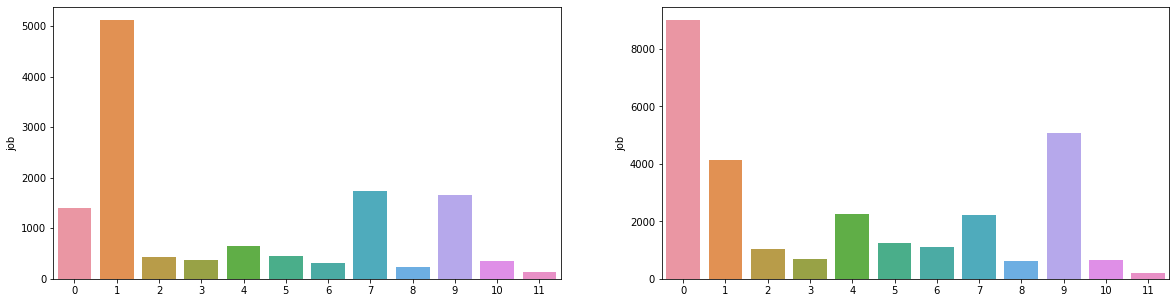

In [41]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=job1_df.index, y=job1_df['job'], ax=ax[0])
sns.barplot(x=job0_df.index, y=job0_df['job'], ax=ax[1])
fig.show()

In [42]:
age1_df = pd.DataFrame(cluster1['age_bin'].value_counts())
age0_df = pd.DataFrame(cluster0['age_bin'].value_counts())

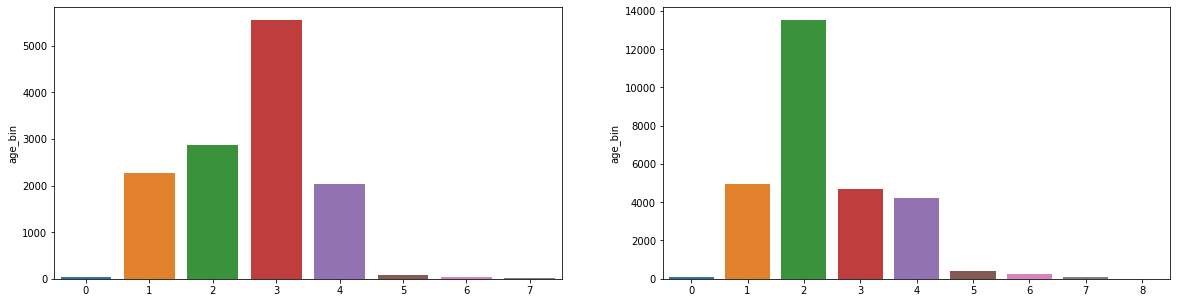

In [43]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=age1_df.index, y=age1_df['age_bin'], ax=ax[0])
sns.barplot(x=age0_df.index, y=age0_df['age_bin'], ax=ax[1])
fig.show()

In [44]:
print(cluster1['marital'].value_counts())
print(cluster0['marital'].value_counts())

1    8636
2    2732
0    1501
3      26
Name: marital, dtype: int64
1    16292
2     8836
0     3111
3       54
Name: marital, dtype: int64


In [45]:
print(cluster1['education'].value_counts())
print(cluster0['education'].value_counts())

3    4186
2    2572
0    1981
5    1459
1    1033
6     977
7     680
4       7
Name: education, dtype: int64
6    11191
3     5329
5     3784
2     3473
0     2195
1     1259
7     1051
4       11
Name: education, dtype: int64


## K-Prototype Clustering

In [52]:
bank_df = pd.read_csv('bankmarketing.csv')

In [53]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [54]:
bank_df1=bank_df[['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome','age','duration','euribor3m']]

In [55]:
cat_var=['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']

In [56]:
num_var=['age','duration','euribor3m']

In [57]:
sum(bank_df1['duration'])/len(bank_df1.index)

258.2850101971448

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le=LabelEncoder()

In [50]:
bank_df1[cat_var]=bank_df1[cat_var].apply(lambda x:le.fit_transform(x))

In [51]:
bank_df1.isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
age            0
duration       0
euribor3m      0
dtype: int64

In [20]:
bank_df1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,3,1,0,0,0,0,1,6,1,1,56,261,287
1,7,1,3,1,0,0,1,6,1,1,57,149,287
2,7,1,3,0,2,0,1,6,1,1,37,226,287
3,0,1,1,0,0,0,1,6,1,1,40,151,287
4,7,1,3,0,0,2,1,6,1,1,56,307,287


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

In [26]:
bank_df1[num_var]=pd.DataFrame(scaler.fit_transform(bank_df1[num_var]),columns=num_var)

In [28]:
from kmodes.kprototypes import KPrototypes

In [33]:
kprototype=KPrototypes(n_clusters=5,max_iter=100)

In [30]:
bank_df1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,3,1,0,0,0,0,1,6,1,1,1.533034,0.010471,0.456785
1,7,1,3,1,0,0,1,6,1,1,1.628993,-0.421501,0.456785
2,7,1,3,0,2,0,1,6,1,1,-0.290186,-0.124520,0.456785
3,0,1,1,0,0,0,1,6,1,1,-0.002309,-0.413787,0.456785
4,7,1,3,0,0,2,1,6,1,1,1.533034,0.187888,0.456785


In [32]:
bank_matrix=bank_df1.as_matrix()

In [36]:
clusters=kprototype.fit_predict(bank_matrix,categorical=[10])

In [38]:
bank_df1['ClusterID']=clusters

In [39]:
bank_df1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m,ClusterID
0,3,1,0,0,0,0,1,6,1,1,1.533034,0.010471,0.456785,1
1,7,1,3,1,0,0,1,6,1,1,1.628993,-0.421501,0.456785,0
2,7,1,3,0,2,0,1,6,1,1,-0.290186,-0.124520,0.456785,0
3,0,1,1,0,0,0,1,6,1,1,-0.002309,-0.413787,0.456785,1
4,7,1,3,0,0,2,1,6,1,1,1.533034,0.187888,0.456785,0


In [60]:
cost=[]
for i in range(2,9):
    kprototype=KPrototypes(n_clusters=i,max_iter=100)
    clusters=kprototype.fit_predict(bank_matrix,categorical=[10])
    cost.append(kprototype.cost_) 

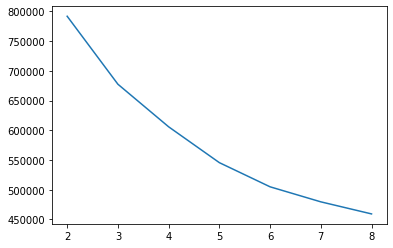

In [62]:
plt.plot(list(range(2,9)),cost)

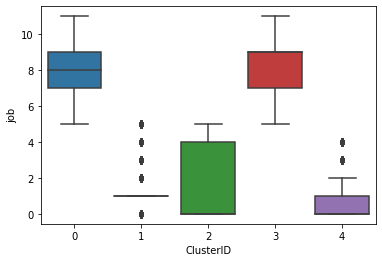

In [41]:
sns.boxplot('ClusterID','job',data=bank_df1)

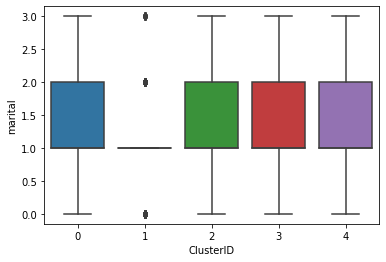

In [42]:
sns.boxplot('ClusterID','marital',data=bank_df1)